# ''' ? ''' 이 있는 부분을 채워주시면 됩니다

나는 내 스타일로 하겠다 하시면 그냥 구현 하셔도 됩니다!!

참고하셔야 하는 함수들은 링크 달아드렸으니 들어가서 확인해보세요

# 1) PCA의 과정을 한번 차근차근 밟아 볼거에요 잘 따라 오세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random
#   기본 모듈들을 불러와 줍니다

In [2]:
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]
#   설명변수 x1, x2, x3의 값이 이렇게 있네요

In [3]:
X = np.stack((x1, x2, x3), axis=0)
#   설명변수들을 하나의 행렬로 만들어 줍니다

In [4]:
X = pd.DataFrame(X.T, columns=['x1', 'x2', 'x3'])

In [5]:
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


In [6]:
# OR
X = np.stack((x1, x2, x3), axis=1)
pd.DataFrame(X, columns=['x1', 'x2', 'x3']).head()

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4


1-1) 먼저 PCA를 시작하기 전에 항상 **데이터를 scaling** 해주어야 해요

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/ 를 참고하시면 도움이 될거에요

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

In [8]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [9]:
features = X_std.T

In [10]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

1-2) 자 그럼 공분산 행렬을 구해볼게요\

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [11]:
# feature 간의 covariance matrix
cov_matrix = np.cov(features)

In [12]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-3) 이제 고유값과 고유벡터를 구해볼게요

방법은 실습코드에 있어요!!

In [13]:
# 공분산 행렬의 eigen value, eigen vector
eigenvalues  = lin.eig(cov_matrix)[0]
eigenvectors = lin.eig(cov_matrix)[1]

In [14]:
print(eigenvalues)
print(eigenvectors)

# 여기서 eigenvectors는 각 eigen vector가 열벡터로 들어가있는 형태!
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
# https://numpy.org/doc/1.18/reference/generated/numpy.linalg.eig.html?highlight=eig#numpy.linalg.eig

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


In [15]:
# 3*3 영행렬
mat = np.zeros((3, 3))

In [16]:
mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
# symmetric matrix = P*D*P.T로 분해
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]
print(mat)

[[1.48756162 0.         0.        ]
 [0.         0.94435407 0.        ]
 [0.         0.         0.72597904]]


In [18]:
# 혹은 아래와 같이 diagonal matrix를 만들 수 있다
np.diag(eigenvalues)

array([[1.48756162, 0.        , 0.        ],
       [0.        , 0.94435407, 0.        ],
       [0.        , 0.        , 0.72597904]])

1-4) 자 이제 고유값 분해를 할 모든 준비가 되었어요 고유값 분해의 곱으로 원래 공분산 행렬을 구해보세요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해서 행렬 끼리 곱하시면 됩니다

행렬 곱으로 eigenvector x mat x eigenvector.T 하면 될거에요

In [19]:
# P*D*P.T
np.dot(np.dot(eigenvectors, mat), eigenvectors.T)

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

In [20]:
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

1-5) 마지막으로 고유 벡터 축으로 값을 변환해 볼게요

함수로 한번 정의해 보았어요

https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [21]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [22]:
def new_coordinates(X, eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new, [X.dot(eigenvectors.T[i])]), axis=0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [23]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [24]:
new_coordinates(X_std, eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 2) PCA를 구현해 보세요

위의 과정을 이해하셨다면 충분히 하실 수 있을거에요

In [25]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X, number):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(X)
    features = x_std.T
    cov_matrix = np.cov(features)
    
    eigenvalues  = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    new_coordinate = new_coordinates(x_std, eigenvectors)
    
    index = eigenvalues.argsort()[::-1] # 내림차순 정렬한 인덱스
    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:, index.index(i)]]
        else:
            new = np.concatenate(([new, [new_coordinate[:, index.index(i)]]]), axis=0)
    return new.T

In [26]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

# 3) sklearn이랑 비교를 해볼까요?

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [28]:
pca.fit_transform(X_std)[:5]

array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111]])

In [29]:
MYPCA(X, 3)[:5]

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111]])

In [30]:
pca = PCA(n_components=2)
pca.fit_transform(X_std)[:5]

array([[-0.31019368, -1.08215716],
       [-1.28092404, -0.43132556],
       [-1.38766381,  0.78428014],
       [-0.95087515, -1.15737142],
       [-1.84222365,  0.88189889]])

In [31]:
MYPCA(X, 2)[:5]

array([[ 0.31019368, -1.08215716],
       [ 1.28092404, -0.43132556],
       [ 1.38766381,  0.78428014],
       [ 0.95087515, -1.15737142],
       [ 1.84222365,  0.88189889]])

# 4) MNIST data에 적용을 해볼게요!

mnist data를 따로 내려받지 않게 압축파일에 같이 두었어요~!!!

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요~!!!

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# mnist 손글씨 데이터를 불러옵니다

In [2]:
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000, 1)


In [4]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
# data information

# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [6]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X, columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y

In [8]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# 지금까지 배운 여러 머신러닝 기법들이 있을거에요

4-1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주시고요

4-2) PCA를 이용하여 mnist data를 축소해서 학습을 해주세요 / test error가 제일 작으신 분께 상품을 드리겠습니다 ^0^

특정한 틀 없이 자유롭게 하시면 됩니다!!!!!!!!!

## 1. train test split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], stratify=df['y'])

In [11]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_test  = standard_scaler.transform(X_test)

In [43]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(52500, 784)
(17500, 784)
(52500,)
(17500,)


In [56]:
print(pd.Series(y_train).value_counts()/len(y_train))
print(pd.Series(y_test).value_counts()/len(y_test))

1.0    0.112533
7.0    0.104190
3.0    0.102019
2.0    0.099848
9.0    0.099390
0.0    0.098610
6.0    0.098229
8.0    0.097505
4.0    0.097486
5.0    0.090190
Name: y, dtype: float64
1.0    0.112514
7.0    0.104171
3.0    0.102000
2.0    0.099886
9.0    0.099429
0.0    0.098629
6.0    0.098229
8.0    0.097486
4.0    0.097486
5.0    0.090171
Name: y, dtype: float64


## 2. 주성분 개수의 결정

1. elbow point (곡선의 기울기가 급격히 감소하는 지점)
2. kaiser's rule (고유값 1 이상의 주성분들)
3. 누적설명률이 70%~80% 이상인 지점

In [13]:
from sklearn.decomposition import PCA

**누적설명률이 70%~80%인 지점**

In [193]:
variance_ratio = {}

for i in range(80, 200):
    if(i%10==0):
        print(i)
    pca = PCA(n_components=i)
    pca.fit(X_scaled_train)
    variance_ratio['_'.join(['n', str(i)])] = pca.explained_variance_ratio_.sum()

10
20
30
40
50
60
70
80
90


In [247]:
pca = PCA()
pca.fit(X_scaled_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [226]:
variance_ratio = []
ratio = 0
for i in np.sort(pca.explained_variance_ratio_)[::-1]:
    ratio += i
    variance_ratio.append(ratio)

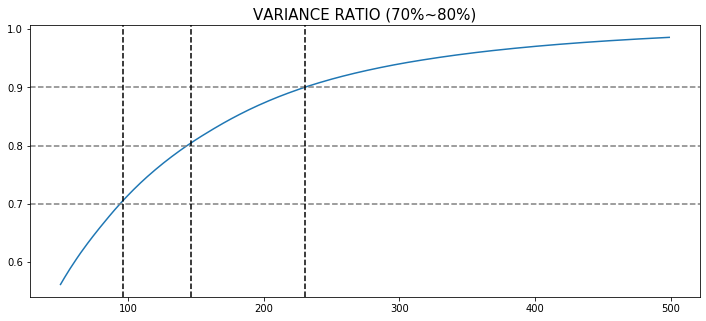

In [243]:
plt.figure(figsize=(12, 5))

plt.plot(list(range(50, 500)), variance_ratio[50:500])

plt.axhline(0.7, color='gray', ls='--')
plt.axhline(0.8, color='gray', ls='--')
plt.axhline(0.9, color='gray', ls='--')

plt.axvline(96, color='black', ls='--')
plt.axvline(146, color='black', ls='--')
plt.axvline(230, color='black', ls='--')

plt.title("VARIANCE RATIO (70%~80%)", size=15)
plt.show()

# scaling한 후
# 96개의 주성분을 선택하면 누적설명률이 70%정도
# 146개의 주성분을 선택하면 누적설명률이 80%정도
# 230개 이상의 주성분을 선택하면 누적설명률이 90%이상 된다.

**elbow point**

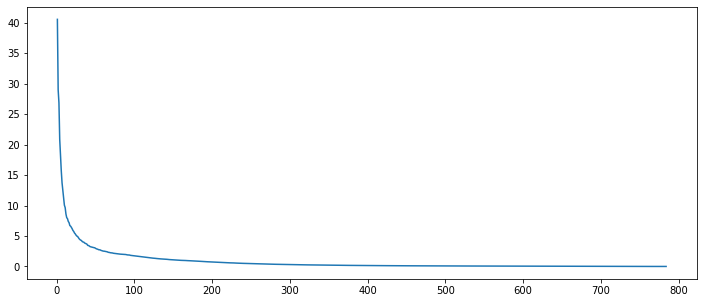

In [248]:
# eigen value를 내림차순으로 정렬한 뒤, plot을 그려보았다.
plt.figure(figsize=(12, 5))
plt.plot(range(1, X.shape[1]+1), np.sort(pca.explained_variance_)[::-1])
plt.show()

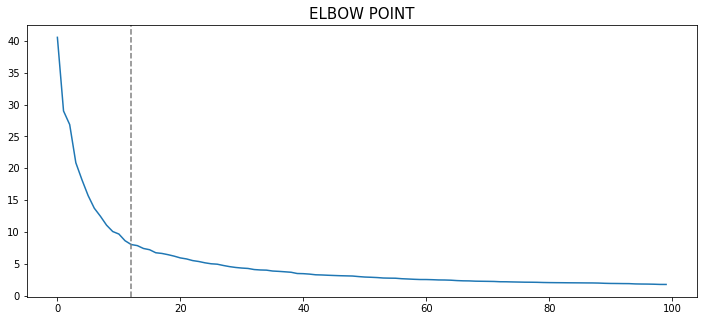

In [250]:
# elbow 포인트 지점을 확인하기 위해 0~100 구간을 세밀하게 살펴보도록 한다.
# 확인 결과, 상위 13개의 eigen value를 제외한 나머지 eigen value 사이에는 그다지 큰 차이가 없는 것으로 보인다.

plt.figure(figsize=(12, 5))
plt.plot(range(0, 100), np.sort(pca.explained_variance_)[::-1][0:100])

plt.title('ELBOW POINT', size=15)
plt.axvline(12, ls='--', color='grey')

plt.show()

**Kaiser's Rule**

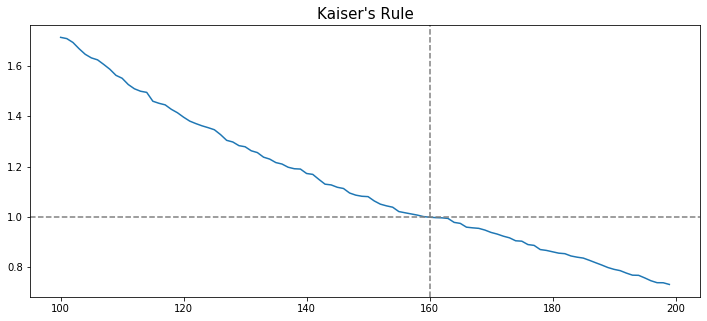

In [266]:
# 이번에는 kaiser's rule에 따라 고유값 1 이상의 주성분을 찾아보고자 한다.
# 이를 위해 100~200 구간을 세밀하게 살펴보았으며,
# 그 결과 160개의 주성분을 사용했을 때 eigenvalue가 모두 1 이상이었다.
plt.figure(figsize=(12, 5))
plt.plot(range(100, 200), np.sort(pca.explained_variance_)[::-1][100:200])

plt.title("Kaiser's Rule", size=15)
plt.axhline(1, ls='--', color='grey')
plt.axvline(160, ls='--', color='grey')

plt.show()

In [188]:
# Kaiser's rule에 따라 160개의 주성분을 선택하여 train을 진행해보도록 하겠다.
# (또한 160개의 주성분을 선택하면 원본 데이터의 변동 중 약 82%정도가 설명가능하다.)

In [14]:
pca = PCA(n_components=160)
pca.fit(X_scaled_train)
X_PCA_train = pca.transform(X_scaled_train)
X_PCA_test  = pca.transform(X_scaled_test)

## 3. Modeling

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import time
import warnings
warnings.filterwarnings('ignore')

**Random Forest**
- Original Data

In [290]:
start = time.time()
rf_clf.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 53.27030920982361


In [291]:
pred = rf_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9678857142857142


- PCA Data

In [271]:
rf_clf = RandomForestClassifier()

In [292]:
start = time.time()
rf_clf.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 84.94275045394897


In [294]:
pred = rf_clf.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.9408571428571428


**Logistic Regression**
- Original Data

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
lr_clf = LogisticRegression()

In [307]:
start = time.time()
lr_clf.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 13.492876052856445


In [308]:
pred = lr_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9225714285714286


In [338]:
param = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid = GridSearchCV(lr_clf, param, cv=5, scoring='accuracy', verbose=10)
grid.fit(X_train, y_train)

In [340]:
grid.best_score_

0.918704761904762

- PCA Data

In [320]:
start = time.time()
lr_clf.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 5.322706937789917


In [321]:
# 원본데이터와 accuracy 차이가 크게 나지 않는다!
# 하지만 Random Forest에 비해 accuracy 떨어진다.
pred = lr_clf.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.9208


In [342]:
param = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid = GridSearchCV(lr_clf, param, cv=5, scoring='accuracy', verbose=10)
grid.fit(X_PCA_train, y_train)

grid.best_score_

0.9200571428571429

**Decision Tree**
- Original Data

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
dt_clf = DecisionTreeClassifier()

In [311]:
start = time.time()
dt_clf.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 24.323933601379395


In [313]:
pred = dt_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8713142857142857


- PCA data

In [317]:
start = time.time()
dt_clf.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 23.95996594429016


In [318]:
# PCA한 경우 성능 확연히 떨어진다.
# 또한 Random Forest, Logistic Regression에 비해서 accuracy 너무 낮다.

pred = dt_clf.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.8281714285714286


**SVM**

In [16]:
from sklearn.svm import SVC

svm = SVC()

In [429]:
svm.fit(X_PCA_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [431]:
pred = svm.predict(X_PCA_test)
accuracy_score(y_test, pred)

0.9674857142857143

In [17]:
param = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid = GridSearchCV(svm, param, cv=3, scoring='accuracy', verbose=10, n_jobs=4)
grid.fit(X_PCA_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 30.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 36.2min
[Parallel(n_jobs=4)]: Done  17 out of  21 | elapsed: 41.7min remaining:  9.8min
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed: 44.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [18]:
# hyper parameter tunning을 통해 accuracy를 높였다.
grid.best_score_

0.9722666666666666

In [19]:
grid.best_params_

{'C': 10}

**XGBoost**

In [323]:
from xgboost import XGBClassifier

In [324]:
xgb = XGBClassifier()

In [325]:
start = time.time()
xgb.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 640.5302169322968


In [326]:
pred = xgb.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.9091428571428571


**LightGBM**
- Original Data

In [327]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

In [331]:
start = time.time()
lgbm.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 153.8949658870697


In [332]:
pred = lgbm.predict(X_test)
print(accuracy_score(pred, y_test))

0.9697142857142858


- PCA Data

In [329]:
start = time.time()
lgbm.fit(X_PCA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 48.97201323509216


In [330]:
pred = lgbm.predict(X_PCA_test)
print(accuracy_score(pred, y_test))

0.9494285714285714


**Stacking (CV)**

- PCA data

In [432]:
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
lgbm = LGBMClassifier()
svm = SVC()

final_model = LGBMClassifier()

In [439]:
def base_model(model, X_train, X_test, y_train, n_split=5):
    
    
#     X_train = X_train.reset_index(drop=True)
#     X_test  = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    
    kfold = KFold(n_splits=n_split)
    train_predicted = np.zeros(X_train.shape[0])
    test_predicted  = np.zeros((n_split, X_test.shape[0]))

    for i, (train_index, val_index) in enumerate(kfold.split(X_train)):
        print(f'step > {i} ')
        train_data = X_train[train_index]
        val_data = X_train[val_index]
        train_y = y_train[train_index]
    
        model.fit(train_data, train_y)
        train_predicted[val_index] = model.predict(val_data)
        test_predicted[i] = model.predict(X_test)

    test_predicted = test_predicted.mean(axis=0)
    
    return train_predicted, test_predicted

In [397]:
rf_train, rf_test = base_model(rf_clf, X_PCA_train, X_PCA_test, y_train)
lr_train, lr_test = base_model(lr_clf, X_PCA_train, X_PCA_test, y_train)
lgbm_train, lgbm_test = base_model(lgbm, X_PCA_train, X_PCA_test, y_train)

stacking_train = np.stack((rf_train, lr_train, lgbm_train)).T
stacking_test  = np.stack((rf_test, lr_test, lgbm_test)).T

# final model로 LGBM 사용
final_model.fit(stacking_train, y_train)
pred = final_model.predict(stacking_test)
print(accuracy_score(y_test, pred)) # 0.9324

# final model로 XGBoost 사용
xgb.fit(stacking_train, y_train)
pred = xgb.predict(stacking_test)
print(accuracy_score(y_test, pred)) # 0.9324

# final model로 Random Forest 사용
rf_clf.fit(stacking_train, y_train)
pred = rf_clf.predict(stacking_test)
print(accuracy_score(y_test, pred)) # 0.9320

step > 0 
step > 1 
step > 2 
step > 3 
step > 4 


In [440]:
PCA_rf_train, PCA_rf_test = base_model(rf_clf, X_PCA_train, X_PCA_test, y_train)
PCA_lgbm_train, PCA_lgbm_test = base_model(lgbm, X_PCA_train, X_PCA_test, y_train)
PCA_svm_train, PCA_svm_test = base_model(svm, X_PCA_train, X_PCA_test, y_train)

step > 0 
step > 1 
step > 2 
step > 3 
step > 4 
step > 0 
step > 1 
step > 2 
step > 3 
step > 4 
step > 0 
step > 1 
step > 2 
step > 3 
step > 4 


In [441]:
PCA_stacking_train = np.stack((PCA_rf_train, PCA_lgbm_train, PCA_svm_train)).T
PCA_stacking_test  = np.stack((PCA_rf_test,  PCA_lgbm_test,  PCA_svm_test)).T

In [443]:
svm.fit(PCA_stacking_train, y_train)
pred = svm.predict(PCA_stacking_test)
accuracy_score(y_test, pred)

0.9583428571428572

In [446]:
lgbm.fit(PCA_stacking_train, y_train)
pred = lgbm.predict(PCA_stacking_test)
accuracy_score(y_test, pred)

0.9577714285714286

In [447]:
PCA_stacking_train = np.stack((PCA_lgbm_train, PCA_svm_train)).T
PCA_stacking_test  = np.stack((PCA_lgbm_test,  PCA_svm_test)).T

svm.fit(PCA_stacking_train, y_train)
pred = svm.predict(PCA_stacking_test)
accuracy_score(y_test, pred)

0.9594285714285714

- Original Data

In [427]:
rf_train, rf_test = base_model(rf_clf, X_train, X_test, y_train)
lr_train, lr_test = base_model(lr_clf, X_train, X_test, y_train)
lgbm_train, lgbm_test = base_model(lgbm, X_train, X_test, y_train)

step > 0 
step > 1 
step > 2 
step > 3 
step > 4 
step > 0 
step > 1 
step > 2 
step > 3 
step > 4 
step > 0 
step > 1 
step > 2 
step > 3 
step > 4 


In [433]:
stacking_train = np.stack((rf_train, lgbm_train)).T
stacking_test  = np.stack((rf_test, lgbm_test)).T

In [434]:
# final model로 LGBM 사용
final_model.fit(stacking_train, y_train)
pred = final_model.predict(stacking_test)
print(accuracy_score(y_test, pred))

# 단일모델보다 결과 안좋다

0.9558285714285715


## 4. Summary

- **PCA Data**
    - SVM - **0.9726**
    - Stacking(lgbm+svm & svm) - 0.9594
    - Stacking(rf+lgbm+svm & svm) - 0.9583
    - LightGBM - 0.9494
    - Random Forest - 0.9409
    - Stacking(rf+lr+lgbm & lgbm) 0.9324
    - Logistic Regression - 0.9208
    - XGBoost -> 0.9091
    - Decision Tree - 0.8282
    


- **Original Data**
    - LightGBM -> **0.9697**
    - Random Forest- 0.9679
    - Stacking (rf+lgbm & lgbm) -> 0.9558
    - Logistic Regression- 0.9226
    - Decision Tree- 0.8713

